# Restaurant data Analysis and Visualization

## Introduction

In this project,we are going to analyse and visualize the restaurant dataset by using pandas and seaborn

This dataset contains the details of a restuarant such as 

* Total - Total bill amount.
* Tip  - How much tip customer gave
* Gender - customer's gender( male or female)
* Smoker - If the customer is smoker or not
* Day - Customer arrived day
* Time - Customer arrived time
* Number of guests - How many number of guests arrived

## Import the modules

In [1]:
import numpy as np
import pandas as pd

from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
data_bill=pd.read_csv("data_restaurant.csv",sep=",",index_col=0)
data_bill

,Total,Tip,Gender,Smoker,Day,Time,Number of guests
0,16.99,1.01,Female,No,Sunday,Night,2
1,10.34,1.66,Male,No,Sunday,Night,3
2,21.01,3.50,Male,No,Sunday,Night,3
3,23.68,3.31,Male,No,Sunday,Night,2
4,24.59,3.61,Female,No,Sunday,Night,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Saturday,Night,3
240,27.18,2.00,Female,Yes,Saturday,Night,2
241,22.67,2.00,Male,Yes,Saturday,Night,2
242,17.82,1.75,Male,No,Saturday,Night,2


## Summarize the data

In [3]:
data_bill.head()

,Total,Tip,Gender,Smoker,Day,Time,Number of guests
0,16.99,1.01,Female,No,Sunday,Night,2
1,10.34,1.66,Male,No,Sunday,Night,3
2,21.01,3.50,Male,No,Sunday,Night,3
3,23.68,3.31,Male,No,Sunday,Night,2
4,24.59,3.61,Female,No,Sunday,Night,4


In [4]:
data_bill.describe()

,Total,Tip,Number of guests
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
data_bill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total             244 non-null    float64
 1   Tip               244 non-null    float64
 2   Gender            244 non-null    object 
 3   Smoker            244 non-null    object 
 4   Day               244 non-null    object 
 5   Time              244 non-null    object 
 6   Number of guests  244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [6]:
data_bill.columns

Index(['Total', 'Tip', 'Gender', 'Smoker', 'Day', 'Time', 'Number of guests'], dtype='object')

In [7]:
data_bill.shape

(244, 7)

## Analyse the data

### Find out if the dataset has any missing values

In [8]:
data_bill.isnull().any()

Total               False
Tip                 False
Gender              False
Smoker              False
Day                 False
Time                False
Number of guests    False
dtype: bool

### Find the total number of guests of all days

In [9]:
data_bill["Number of guests"].sum()

627

### Find the total number of guests daywise

In [10]:
group=data_bill["Number of guests"].groupby(data_bill["Day"])
group.sum()

Day
Friday       40
Saturday    219
Sunday      216
Thursday    152
Name: Number of guests, dtype: int64

### Find the total number of guests by gender

In [11]:
group1=data_bill["Number of guests"].groupby(data_bill["Gender"])
group1.sum()

Gender
Female    214
Male      413
Name: Number of guests, dtype: int64

### Find the total number of guests by Smoker

In [12]:
group2=data_bill["Number of guests"].groupby(data_bill["Smoker"])
group2.sum()

Smoker
No     403
Yes    224
Name: Number of guests, dtype: int64

### Find the average total by daywise

In [13]:
group=data_bill["Total"].groupby(data_bill["Day"])
group.mean()

Day
Friday      17.151579
Saturday    20.441379
Sunday      21.410000
Thursday    17.682742
Name: Total, dtype: float64

### Find out the peoples who gave minimum tip

In [14]:
data_bill[data_bill["Tip"]==data_bill["Tip"].min()].value_counts()

Total  Tip  Gender  Smoker  Day       Time   Number of guests
3.07   1.0  Female  Yes     Saturday  Night  1                   1
5.75   1.0  Female  Yes     Friday    Night  2                   1
7.25   1.0  Female  No      Saturday  Night  1                   1
12.60  1.0  Male    Yes     Saturday  Night  2                   1
dtype: int64

### Find out the maximum tip value and the gender of who gave the tip

In [15]:
data_bill[data_bill["Tip"]==data_bill["Tip"].max()][["Tip","Gender"]]

,Tip,Gender
170,10.0,Male


### Find out maximum total value and those are smokers are not

In [16]:
data_bill[data_bill["Total"]==data_bill["Total"].max()]["Smoker"]

170    Yes
Name: Smoker, dtype: object

### Find how many of them gave 5.0 as a tip

In [17]:
data_bill[data_bill["Tip"]==5.0].count()

Total               10
Tip                 10
Gender              10
Smoker              10
Day                 10
Time                10
Number of guests    10
dtype: int64

# Data Visualization

### Draw a jointplot for Tip vs Total 

### jointplot

Combines two displots for bivariate data

default kind is "scatter"

"kde","hex","reg" options also available

* kde -- kernel density estimation
 
* red -- linear regression
 
* hex,resid,scateer

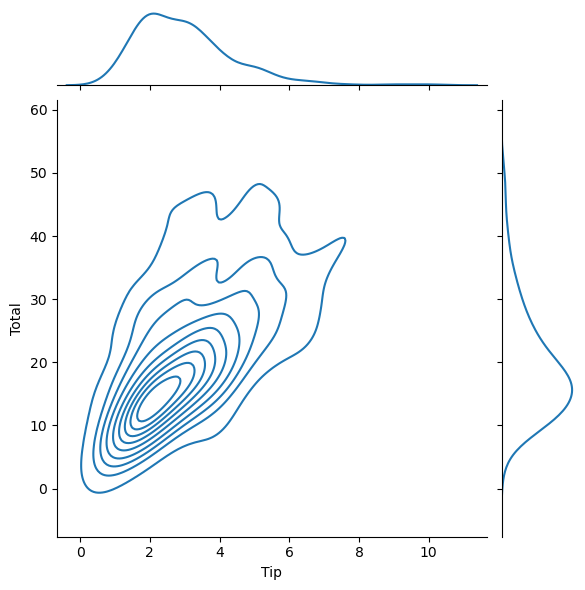

In [18]:
sns.jointplot(data=data_bill,x='Tip',y='Total',kind='kde')

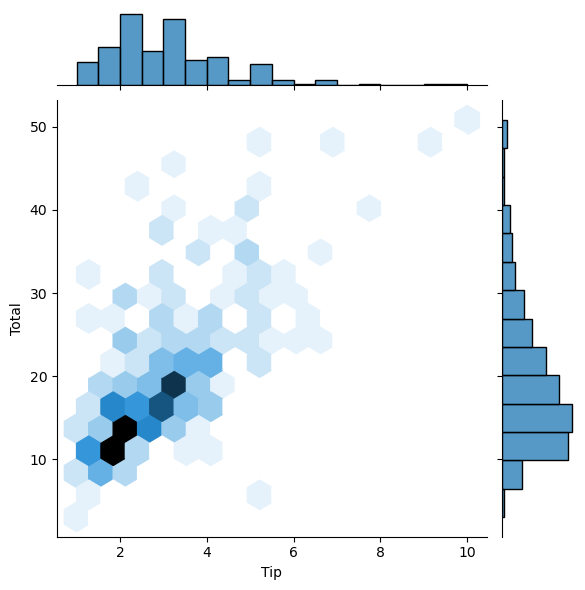

In [19]:
sns.jointplot(data=data_bill,x='Tip',y='Total',kind='hex')

### Heatmap

<Axes: >

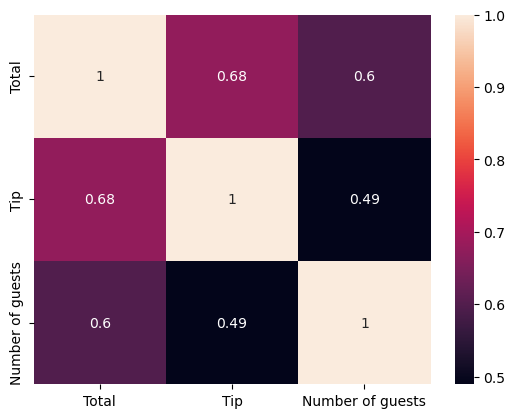

In [20]:
corr=data_bill.corr()
sns.heatmap(corr,annot=True)

### Draw a pairplot for the dataset differentiate by gender

### pairplot

Pairplot will identify and plot pairwise relationships (for numerical data) for all the columns in the dataset. Categorical data is distinguished by the hue option. 

* diagonal plot type --> diag_kind = 'hist' or 'kde'

* non-diagonal plot --> kind = 'scatter' or 'reg'

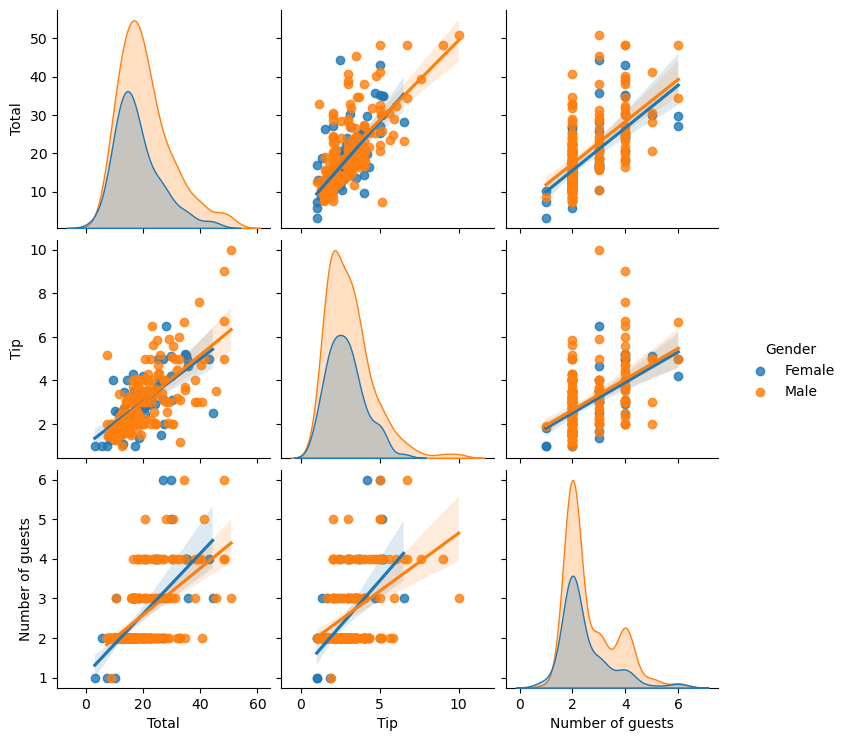

In [21]:
#sns.pairplot(data_bill)
sns.pairplot(data_bill,diag_kind="kde", kind="reg",hue="Gender")
#sns.pairplot(data_bill,diag_kind="auto",kind="reg",hue="Gender")

### Draw a barplot between Day vs Average of the Total 

### bar plot 

Bar plot gives us numerical information for a categorical data type.

estimator --> What kind of a numerical property of the category to display.
By default its set to mean but agg functions such as np.std,np.max,np.min can also be used.

<Axes: xlabel='Day', ylabel='Total'>

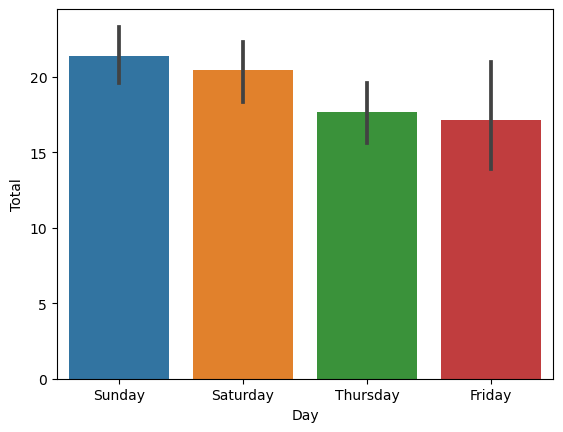

In [22]:
sns.barplot(x="Day",y="Total",data=data_bill)

### Draw a bar plot between Day and Maximum Total value.

<Axes: xlabel='Day', ylabel='Total'>

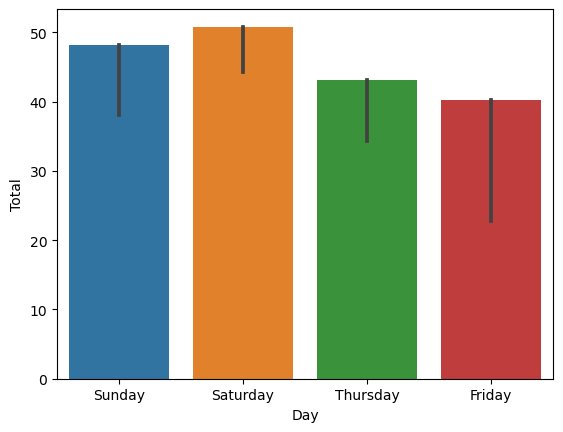

In [23]:
sns.barplot(x="Day",y="Total",data=data_bill,estimator=np.max)

### Draw a graph to find out how many guests are smokers and how many of them are non-smokers.

### count plot

Similarly to bar plot but instead aggregated information about the data, it displays directly the count of that category in the data.

<Axes: xlabel='Smoker', ylabel='count'>

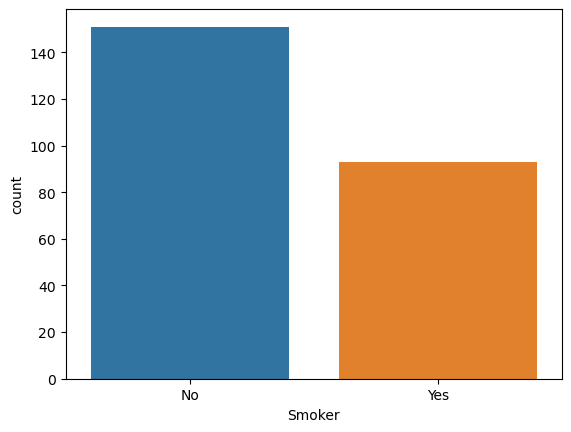

In [24]:
sns.countplot(x="Smoker",data=data_bill)

### Draw a graph to find out how many men and women guests are smokers and how many of them are non-smokers

<Axes: xlabel='Smoker', ylabel='count'>

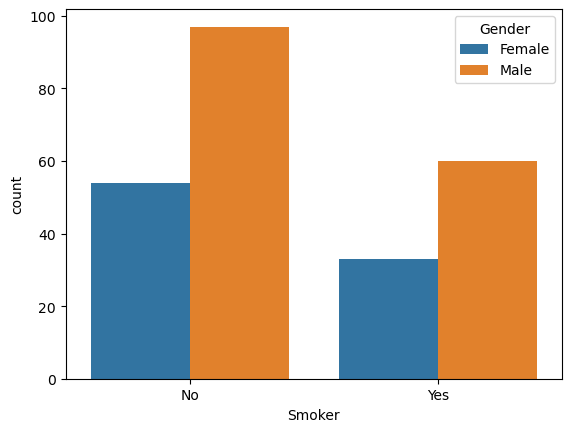

In [25]:
sns.countplot(x="Smoker",data=data_bill,hue="Gender")

### Draw a graph between Time vs Tip differentiate by guests Gender (Use box plot)

### box plot

It is used to show the quantitative distribution of a category. The box represents the quartilies of the category,whereas the whiskers represent the distribution of the rest of the data. The points are called the outliners which represent extreme points(meaning points very distant from the rest of the data)

<Axes: xlabel='Time', ylabel='Tip'>

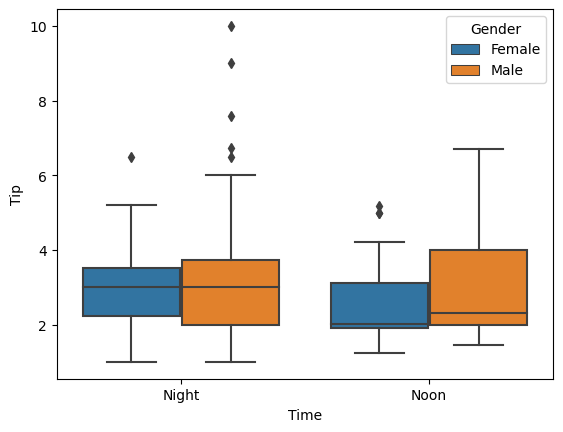

In [26]:
sns.boxplot(x="Time",y="Tip",data=data_bill,hue="Gender")

### Draw a graph between Day vs Tip differentiate by if the guests are Smoker or not (Use violin plot)

### violin plot

Violin serves a similar purpose to box plot but uses kde to represent thr distribution of the data.

<Axes: xlabel='Day', ylabel='Tip'>

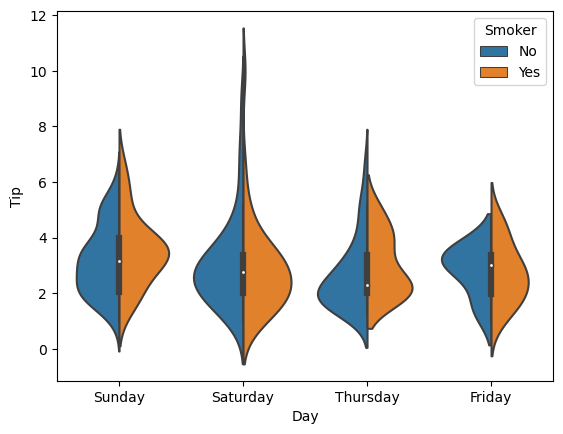

In [27]:
sns.violinplot(x="Day",y="Tip",data=data_bill,hue="Smoker",split=True)

### Draw a strip plot between Time vs Total differentiate by guests Gender

### strip plot

Strip plot comes in handy(compared to box and violin plot) when we want to see both the distribution of the data and every point in the data.
Every data in the dataset is represented with a point forming strip.

<Axes: xlabel='Time', ylabel='Total'>

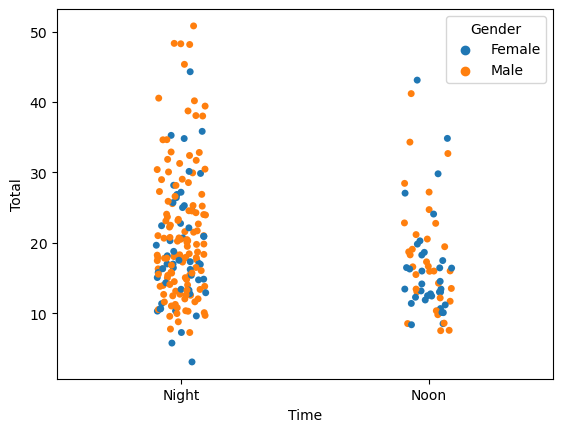

In [28]:
sns.stripplot(x="Time",y="Total",data=data_bill,jitter=True,hue="Gender")

### Draw a swarm plot between Time & Total differentiate by if the guests are smokers or not

### swarm plot

Swarm plot is similar to strip plot however it tends to wider along the category axis where the data accumulates so that points do not overlap. 
It becomes widest where the data is densely located. It is more useful to see the distribution in dense areas.

<Axes: xlabel='Time', ylabel='Total'>

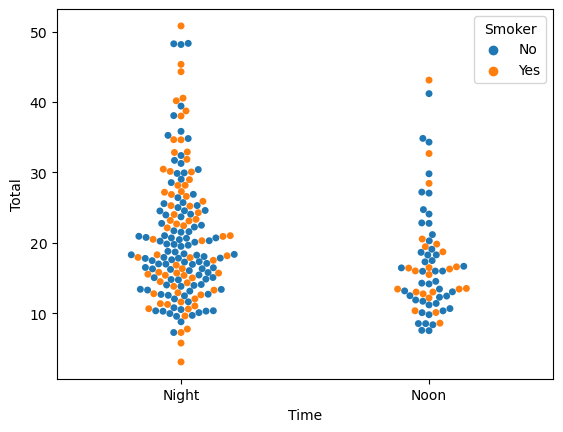

In [29]:
sns.swarmplot(x="Time",y="Total",data=data_bill,hue="Smoker")

### Draw a graph between Time & Total by using Swarmplot and violinplot. And combine them into a single plot

<Axes: xlabel='Time', ylabel='Total'>

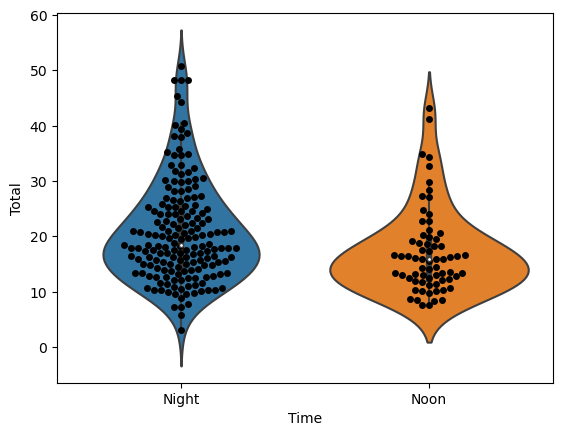

In [30]:
sns.swarmplot(x="Time",y="Total",data=data_bill,color="black")
sns.violinplot(x="Time",y="Total",data=data_bill)
#sns.barplot(x="Time",y="Total",data=data_bill)

### By using catplot,draw a graph between Day vs Total differenciate by guests Gender

### cat plot

catplot is a general plot type for categorical data. It is necessary to provide the "kind" to control the type of categorical plot we got. 

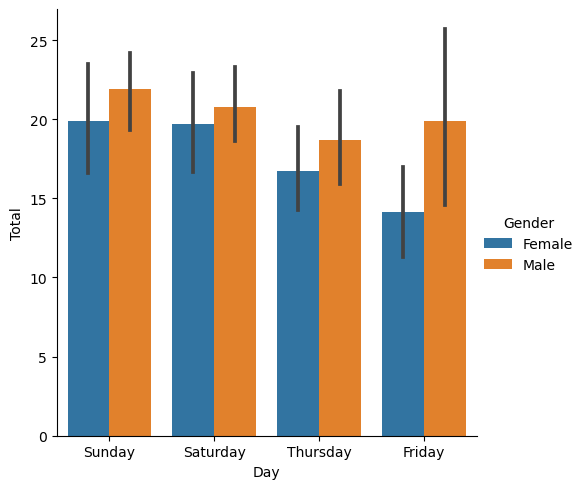

In [31]:
sns.catplot(x="Day",y="Total",data=data_bill,kind="bar",hue="Gender")

### By using catplot draw a graph between Day vs Total differentiate by guests Gender and make it as two seperate graphs

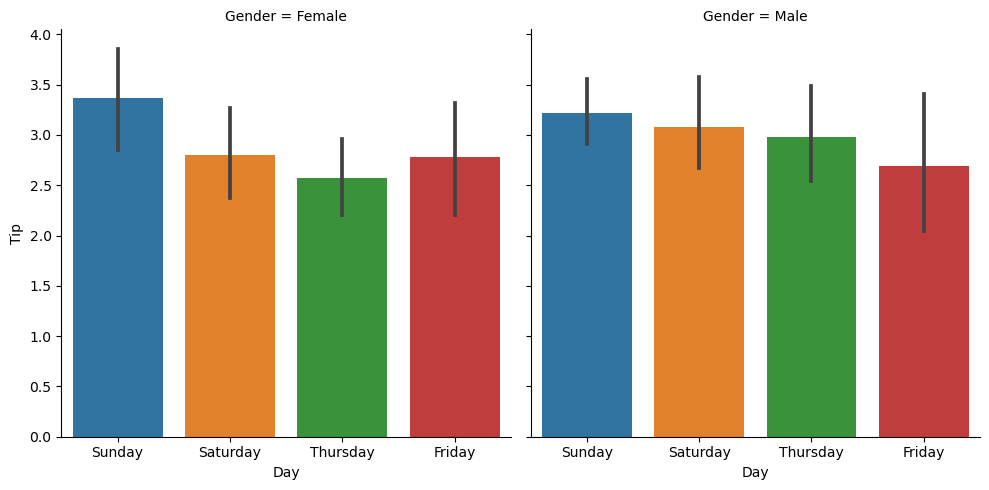

In [32]:
sns.catplot(x="Day",y="Tip",data=data_bill,kind="bar",col="Gender") 
#col -- column

### Draw a scatter plot for tip vs total by customer gender and smoker or not

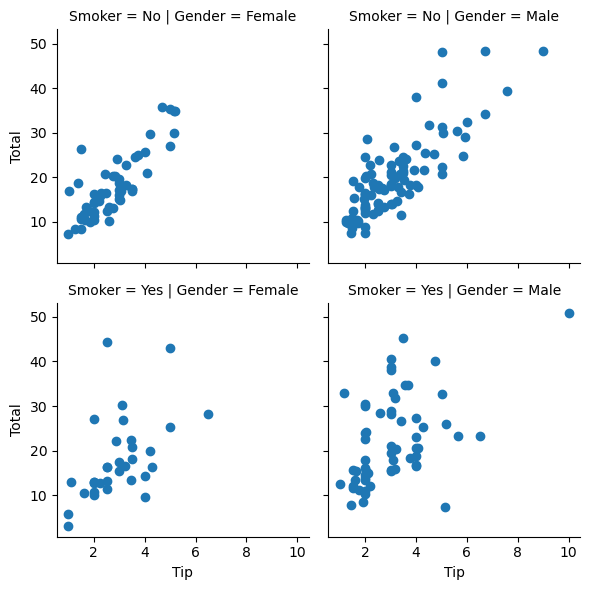

In [33]:
bill_facet=sns.FacetGrid(data_bill,row="Smoker",col="Gender")

bill_facet.map(plt.scatter,"Tip","Total")

### Draw lmplot between Total vs Tip

### lmplot   

Combination of linear regression and FacetGrid plots

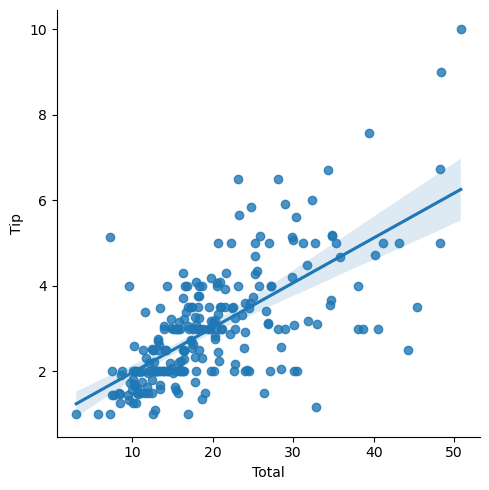

In [34]:
sns.lmplot(x="Total",y="Tip",data=data_bill)

### Draw implot for Genderwise Total vs Tip differentiate by if the guests are smokers or not

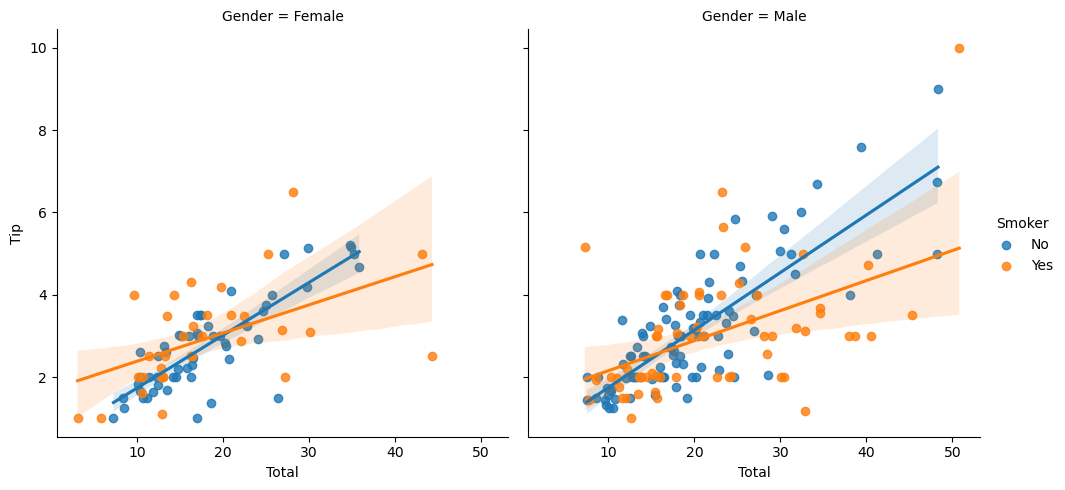

In [35]:
sns.lmplot(x="Total",y="Tip",data=data_bill,col="Gender",hue="Smoker")

### Draw lmplot for Daywise Total vs Tip differentiate by Guests Gender

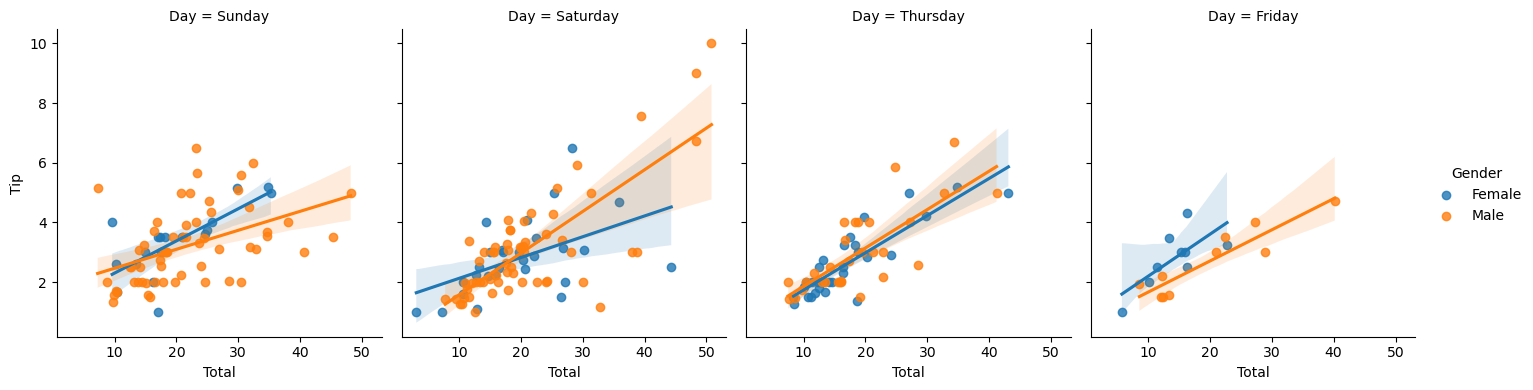

In [36]:
sns.lmplot(x="Total",y="Tip",data=data_bill,col="Day",hue="Gender",aspect=0.9,height=4)

### Create a barplot between Day vs Total and edit the plot roperties

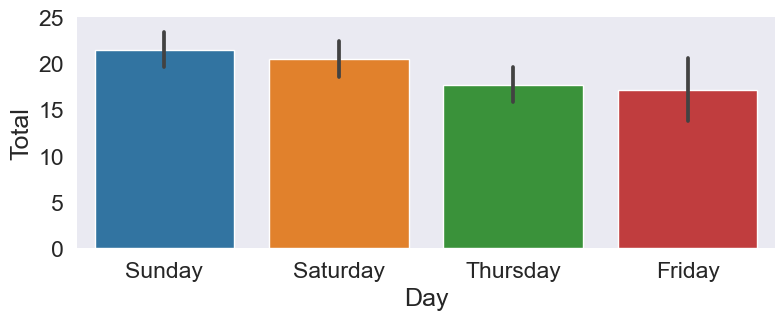

In [37]:
plt.figure(figsize=(9,3))       #figsize(x,y)

sns.set_style('dark')
sns.set_context('notebook',font_scale=1.5)            # paper, talk, notebook

sns.barplot(x='Day',y='Total',data=data_bill)

plt.xlabel='Days',
plt.ylabel='Total amount',
plt.title='Total amount with respect to days'


plt.ylim(0,25)

sns.despine(left=True,right=True,bottom=True,top=True)

### Create a Pairplot for data_bill dataset and save the plot as a png file

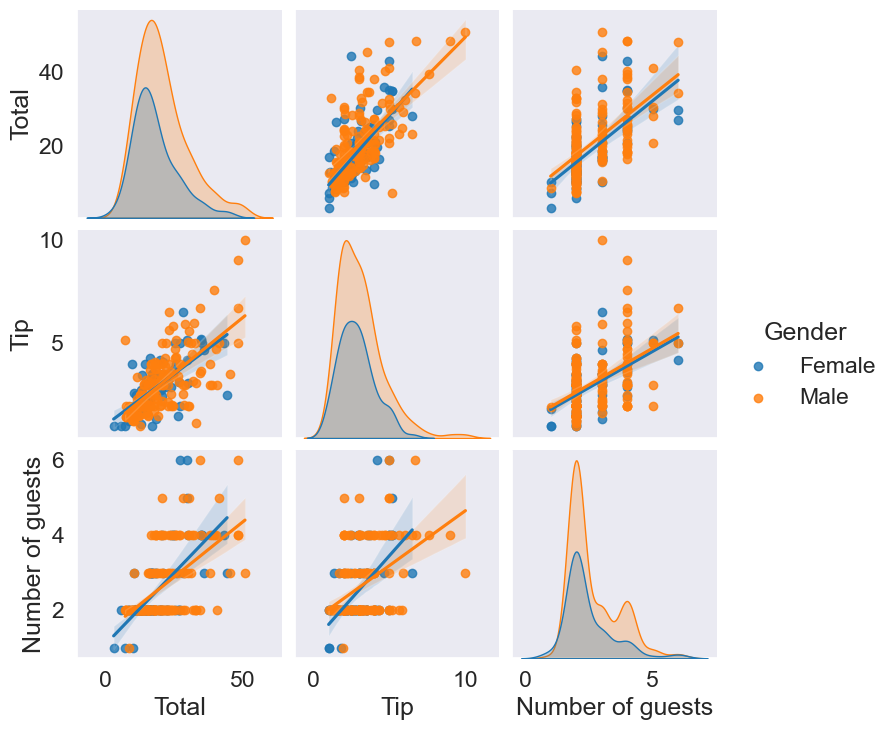

In [38]:
c=sns.pairplot(data_bill,diag_kind="kde",kind="reg",hue="Gender")

c.savefig("pair_plot_bill.png")   # If we give transparent=True,the image background will be transparent.

## Conclusion

We have completed the analysis and visusalization of the restaurant dataset which contains the various details of a restaurant by using pandas and seaborn on different perspectives.